In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stat
import pylab

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/DeepLearningDara/price.csv")

Mounted at /content/drive


# information about data
name: Name of the player

club: Club of the player

age : Age of the player

position : The usual position on the pitch

position_cat : 
- 1 for attackers

- 2 for midfielders

- 3 for defenders

- 4 for goalkeepers

market_value : As on transfermrkt.com on July 20th, 2017

page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017

fpl_value : Value in Fantasy Premier League as on July 20th, 2017

fpl_sel : % of FPL players who have selected that player in their team

fpl_points : FPL points accumulated over the previous season

region: 
- 1 for England
- 2 for EU
- 3 for Americas
- 4 for Rest of World

nationality

new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)

age_cat

club_id

big_club: Whether one of the Top 6 clubs

new_signing: Whether a new signing for 2017/18 (till 20th July)

In [3]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [4]:
df.tail()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,0.10%,12,4.0,Senegal,0,3,20,0,0


In [5]:
df['fpl_sel'] = df['fpl_sel'].replace('%','',regex=True).astype('float')

In [6]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,2.0,France,0,4,1,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    float64
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 61.4+ KB


In [8]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,3.244252,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,5.675657,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,0.200000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,1.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,3.300000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,45.000000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [9]:
df['club'].unique() #no. of unique club names

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [10]:
df['position'].unique() #no. of unique position in the dataset

array(['LW', 'AM', 'GK', 'RW', 'CB', 'RB', 'CF', 'LB', 'DM', 'RM', 'CM',
       'SS', 'LM'], dtype=object)

In [11]:
df['region'].unique()

array([ 3.,  2.,  1.,  4., nan])

In [12]:
df['new_foreign'].unique()

array([0, 1])

In [13]:
df['age_cat'].unique()

array([4, 6, 2, 3, 1, 5])

In [14]:
df['big_club'].unique()

array([1, 0])

In [15]:
df['new_signing'].unique()

array([0, 1])

In [16]:
correlation = df.corr()

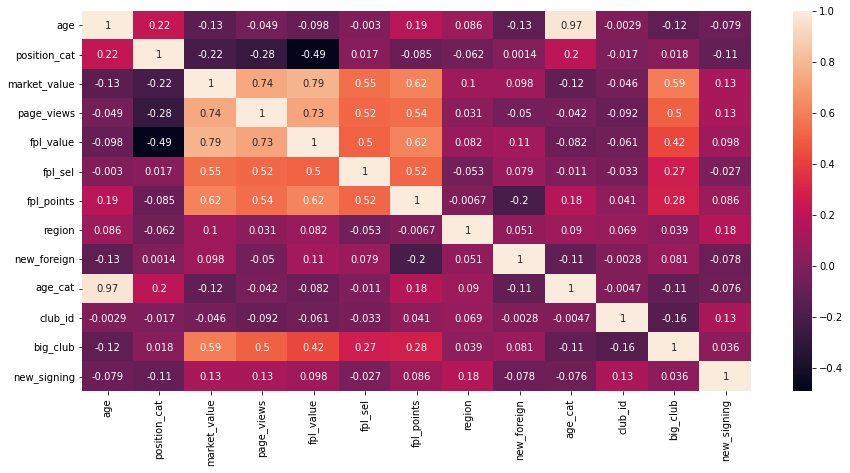

In [17]:
plt.subplots(figsize=(15,7))
sns.heatmap(correlation, xticklabels= correlation.columns, yticklabels= correlation.columns, annot= True)

In [18]:
df.corr()['market_value'].sort_values()
# This is showing that fpl_value and page_views have the highest correlation with output_Var

position_cat   -0.217637
age            -0.132396
age_cat        -0.117682
club_id        -0.046068
new_foreign     0.098056
region          0.101659
new_signing     0.131321
fpl_sel         0.548703
big_club        0.593483
fpl_points      0.615155
page_views      0.739657
fpl_value       0.788653
market_value    1.000000
Name: market_value, dtype: float64

In [19]:
df.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

In [20]:
features = ['age', 'position_cat', 'page_views', 'fpl_value', 'fpl_sel','fpl_points', 'region', 'new_foreign', 'age_cat', 'club_id', 'big_club', 'new_signing']

In [21]:
len(features)

12

In [22]:
corr = df.corr('pearson')

In [23]:
# Take absolute values of correlations
corrs = [abs(corr[attr]['market_value']) for attr in list(features)]

In [24]:
corrs

[0.13239623149378996,
 0.21763671559096182,
 0.7396565249278088,
 0.7886534125526214,
 0.5487033394260774,
 0.6151545320799923,
 0.10165853987660343,
 0.09805599539264608,
 0.1176819772116965,
 0.0460680590676708,
 0.5934829624216418,
 0.1313206048349614]

In [25]:
# Make a list of pairs [(corrs, features)]
l = list(zip(corrs, list(features)))

In [26]:
# Sort the list of pairs
l.sort(key = lambda x:x[0], reverse=True)

In [27]:
# unzip pairs into two lists
corrs, labels = list(zip((*l)))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


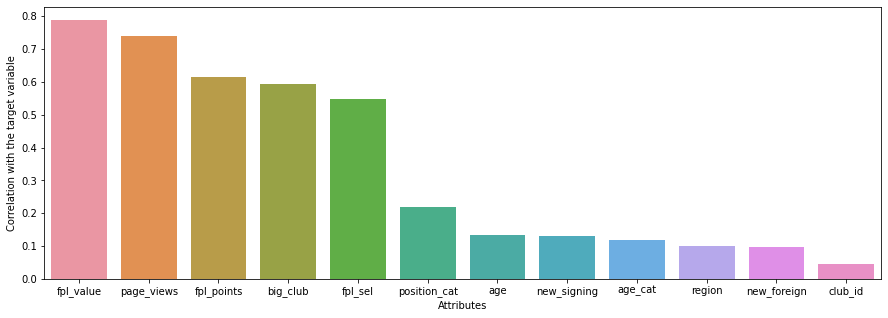

In [29]:
# Plot correlations with respect to the variable as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15,5))
sns.barplot(index, list(corrs))

# Show the plot
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index, labels)
plt.show()

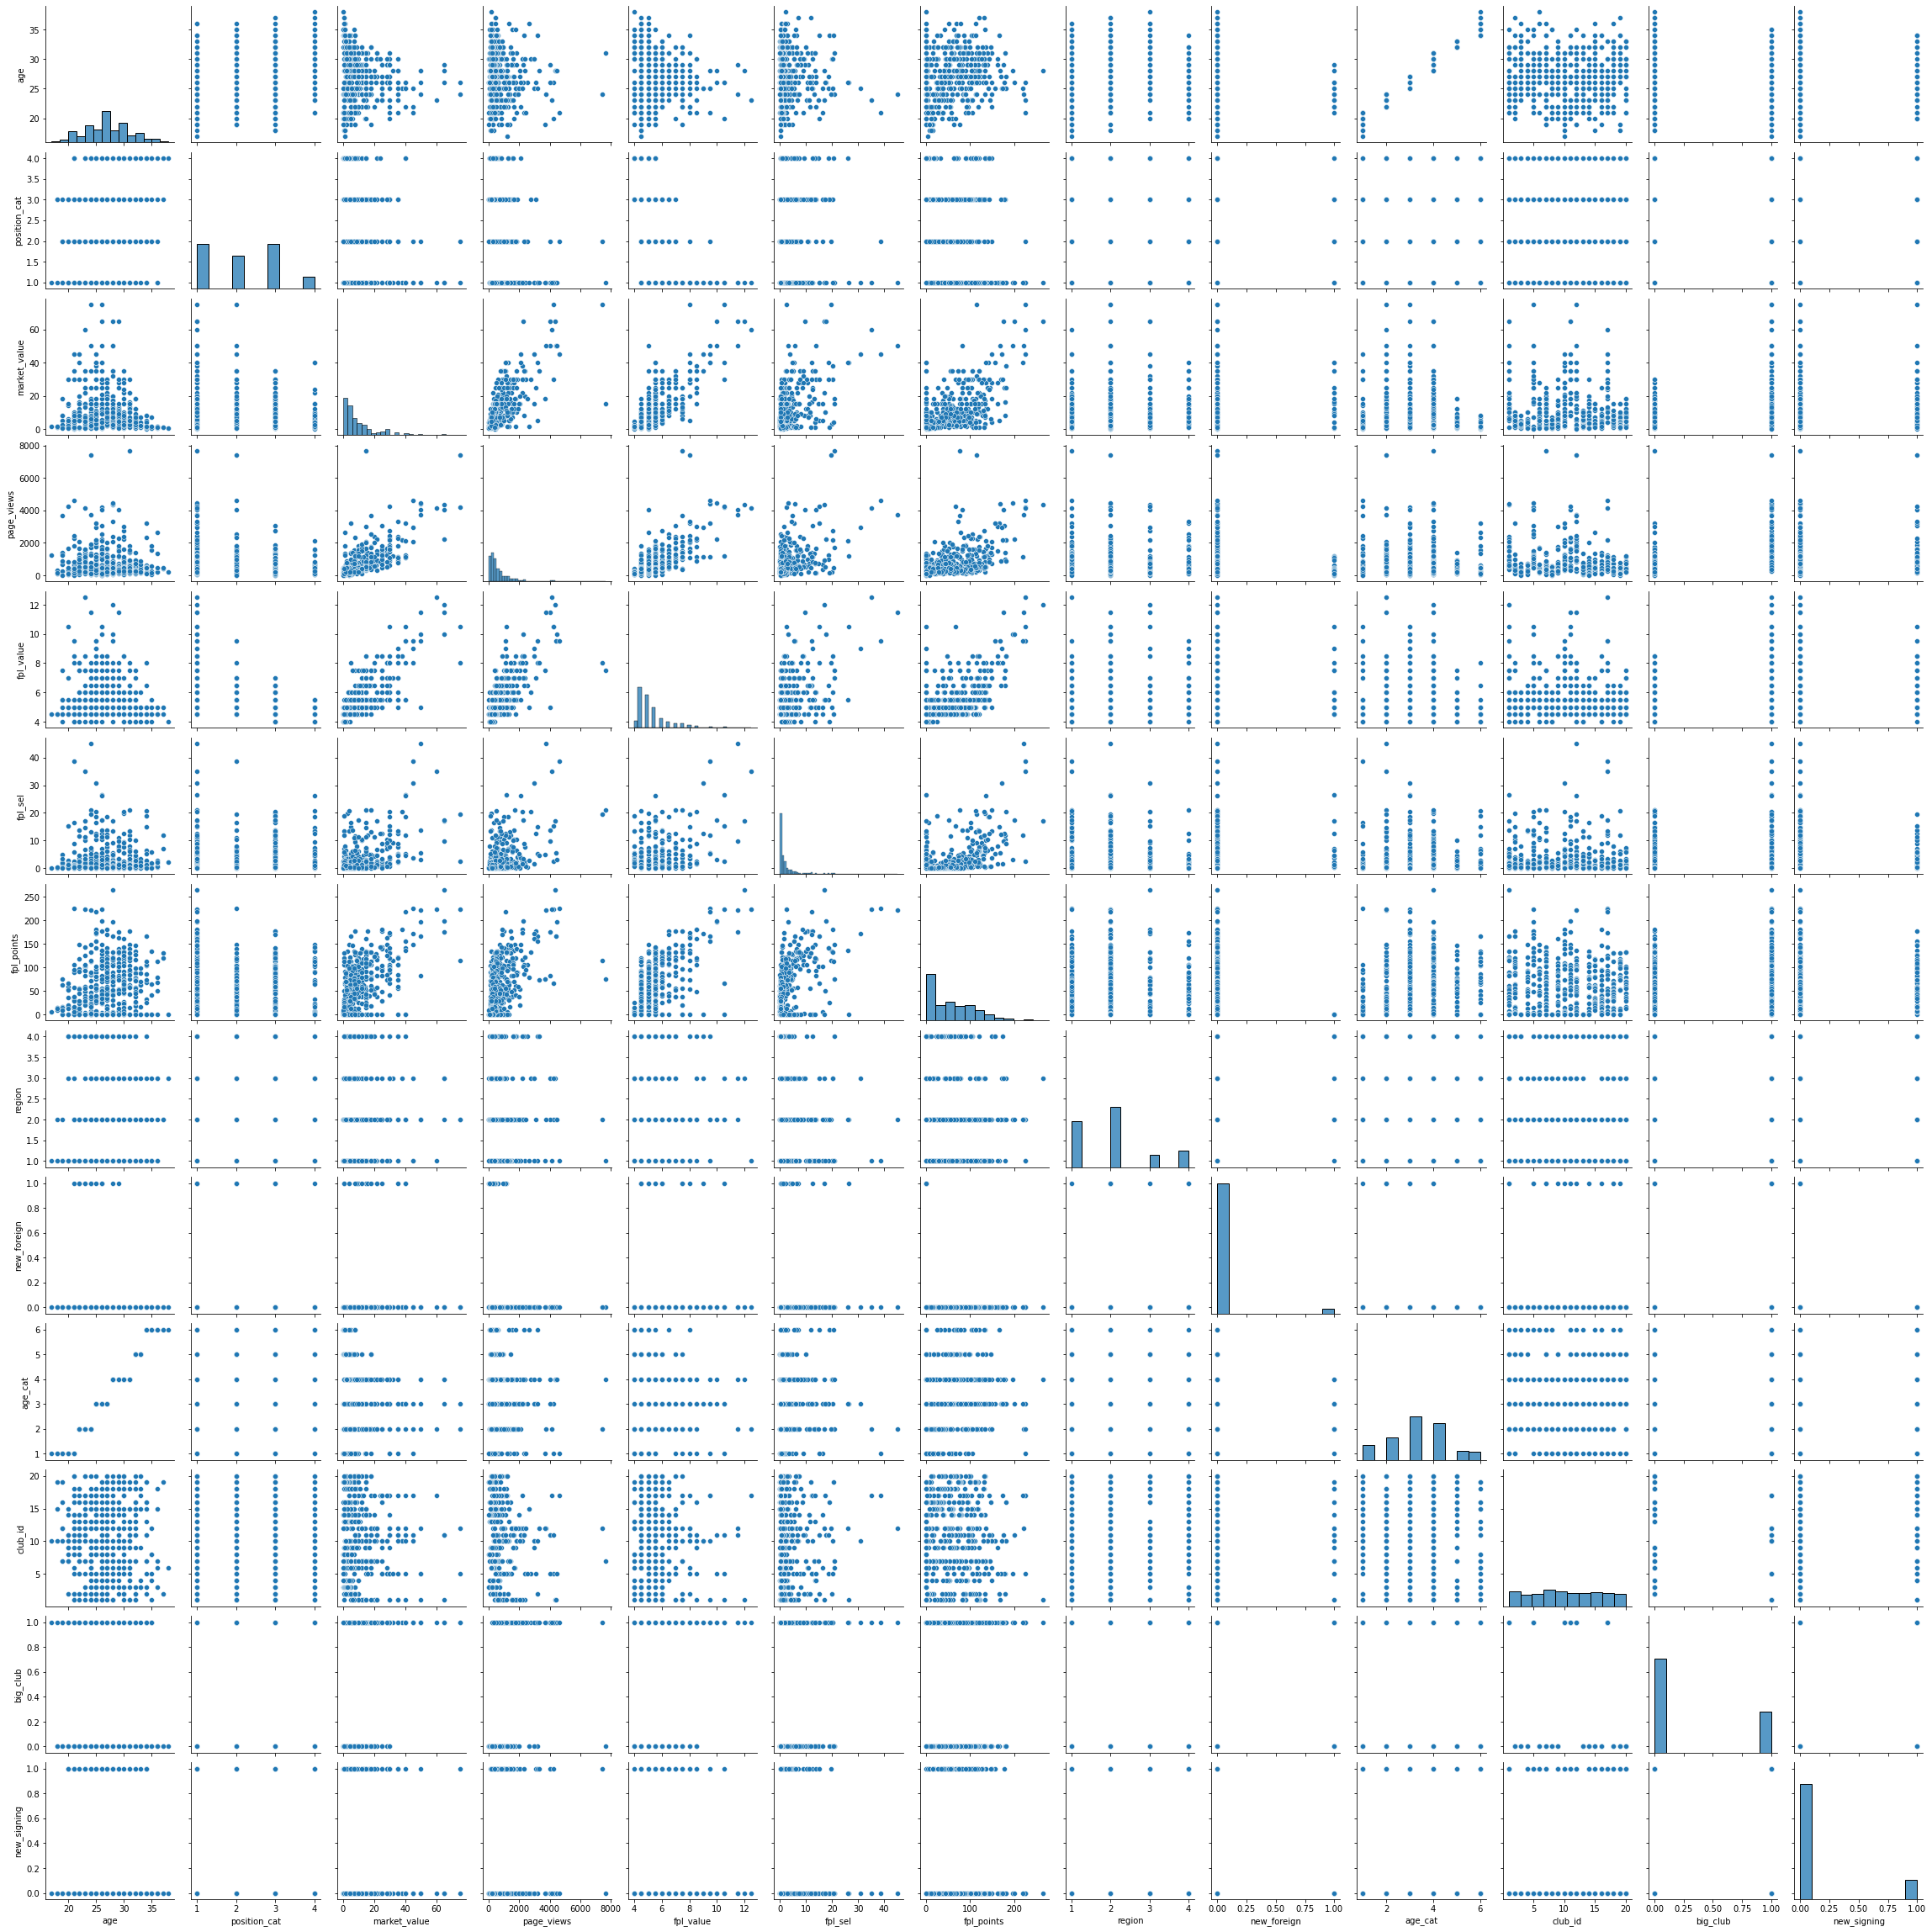

In [31]:
sns.pairplot(df)

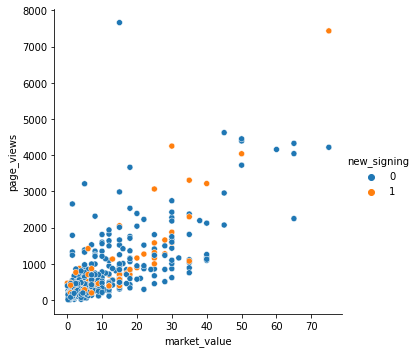

In [32]:
sns.relplot(x = "market_value", y= "page_views", hue="new_signing", data= df)

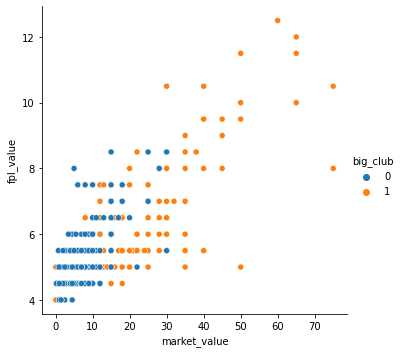

In [33]:
sns.relplot(x = "market_value", y= "fpl_value", hue="big_club", data= df)

### from above two plots we can see that there is some linear realtion between market value of player and page views as well as fpl value

In [34]:
#Filtering with pandas
value = df["market_value"]>40
age = df["age"]<25
df[age & value]  

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
242,Raheem Sterling,Manchester+City,22,LW,1,45.0,2074,8.0,3.8,149,1.0,England,0,2,11,1,0
260,Romelu Lukaku,Manchester+United,24,CF,1,50.0,3727,11.5,45.0,221,2.0,Belgium,0,2,12,1,0
263,Paul Pogba,Manchester+United,24,CM,2,75.0,7435,8.0,19.5,115,2.0,France,0,2,12,1,1
376,Dele Alli,Tottenham,21,CM,2,45.0,4626,9.5,38.6,225,1.0,England,0,1,17,1,0
377,Harry Kane,Tottenham,23,CF,1,60.0,4161,12.5,35.1,224,1.0,England,0,2,17,1,0


### the above cell shows players who are younger in age but have a high market value

### Looking at the numerical variables in the dataset

In [35]:

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  13


,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
0,28,1,65.0,4329,12.0,17.1,264,3.0,0,4,1,1,0
1,28,1,50.0,4395,9.5,5.6,167,2.0,0,4,1,1,0
2,35,4,7.0,1529,5.5,5.9,134,2.0,0,6,1,1,0
3,28,1,20.0,2393,7.5,1.5,122,1.0,0,4,1,1,0
4,31,3,22.0,912,6.0,0.7,121,2.0,0,4,1,1,0


### Numerical variables are usually of 2 type
- Continous variable and Discrete Variables

In [36]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<=20]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 8


In [37]:
discrete_feature

['position_cat',
 'fpl_value',
 'region',
 'new_foreign',
 'age_cat',
 'club_id',
 'big_club',
 'new_signing']

In [38]:
df[discrete_feature].head()

,position_cat,fpl_value,region,new_foreign,age_cat,club_id,big_club,new_signing
0,1,12.0,3.0,0,4,1,1,0
1,1,9.5,2.0,0,4,1,1,0
2,4,5.5,2.0,0,6,1,1,0
3,1,7.5,1.0,0,4,1,1,0
4,3,6.0,2.0,0,4,1,1,0


## Lets Find the realtionship between discrete features and market value

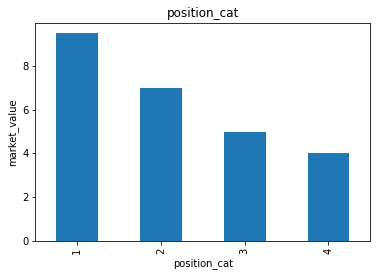

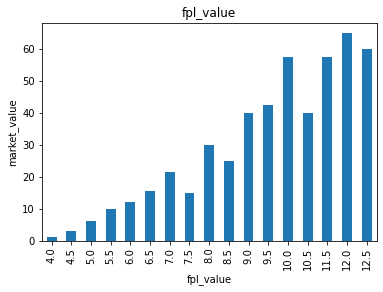

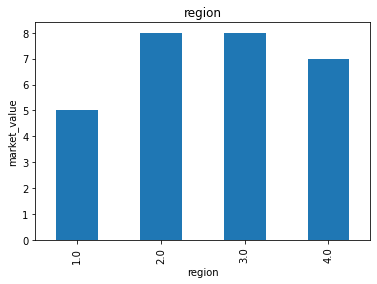

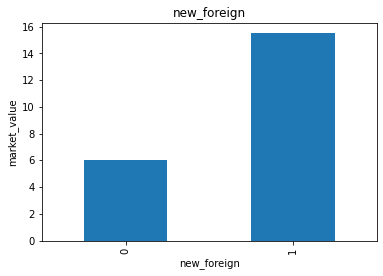

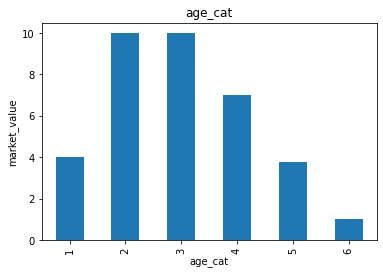

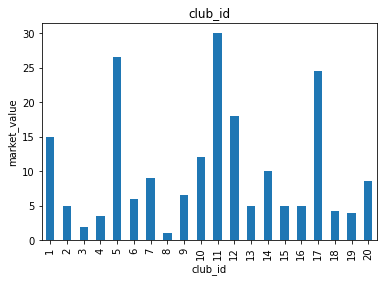

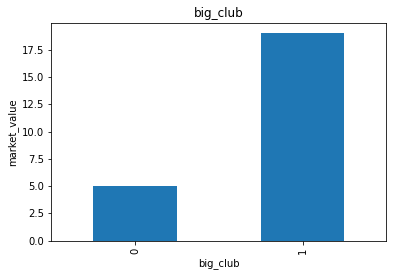

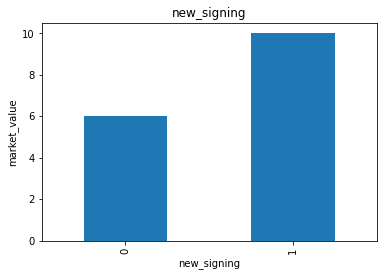

In [39]:
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['market_value'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('market_value')
    plt.title(feature)
    plt.show()

from above graphs we can see that their is some relationship between the discreate numerical variables and the market value
- position category
- flp_value
- new foreigin
- age category
etc.

### Now let's look at the continous numerical variables

In [40]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


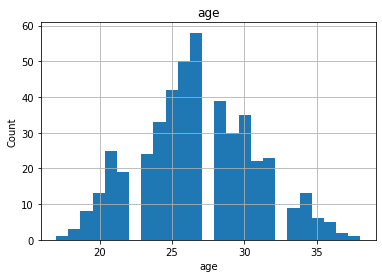

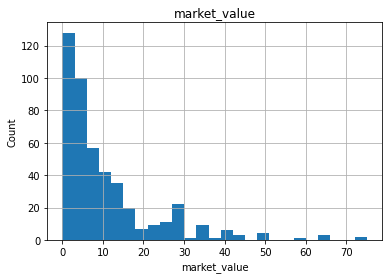

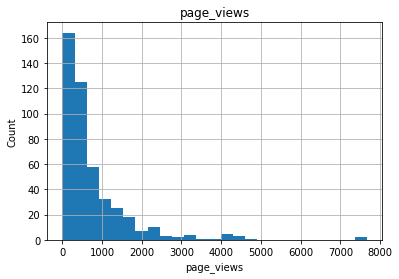

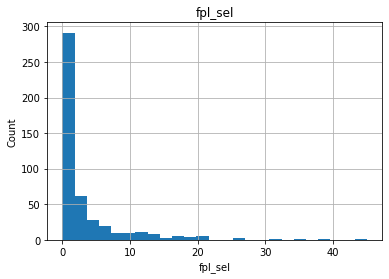

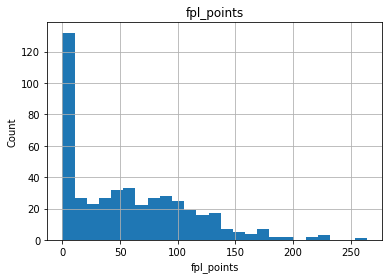

In [41]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

By looking at the distribution of above continous vaiables we can see that age seems to be normally distributed but the rest of the features are right skewed

### There are different transformation techniques available using which we can convert a non gaussian distribution into gaussian distribution
- log transformation is one of those techiniques

Let's see apply the log transformation and see how the distributions changes

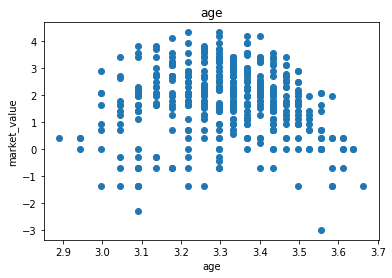

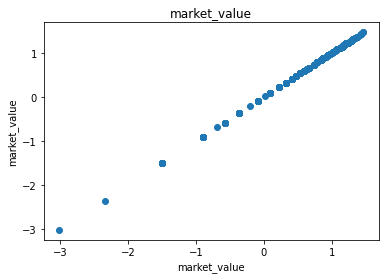

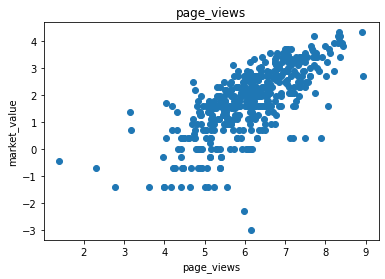

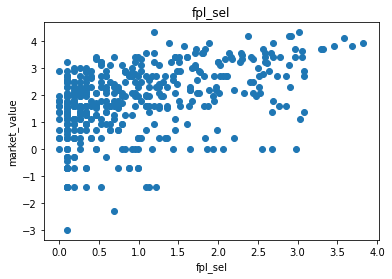

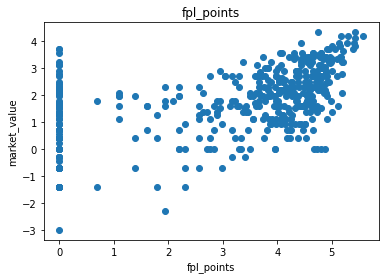

In [42]:
for feature in continuous_feature:
    data=df.copy()
    data[feature]=np.log(data[feature]+1)
    data['market_value']=np.log(data['market_value'])
    plt.scatter(data[feature],data['market_value'])
    plt.xlabel(feature)
    plt.ylabel('market_value')
    plt.title(feature)
    plt.show()

In [44]:
#### If you want to check whether feature is guassian distributed or not
#### Q-Q plot
def Q_Q_plot(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

For age skewness is 0.13553310106589725


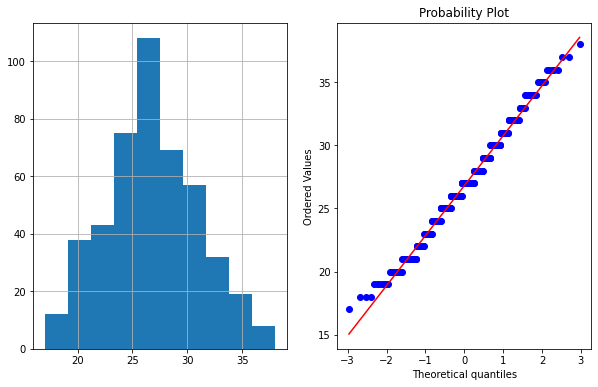

For market_value skewness is 2.1625484427984265


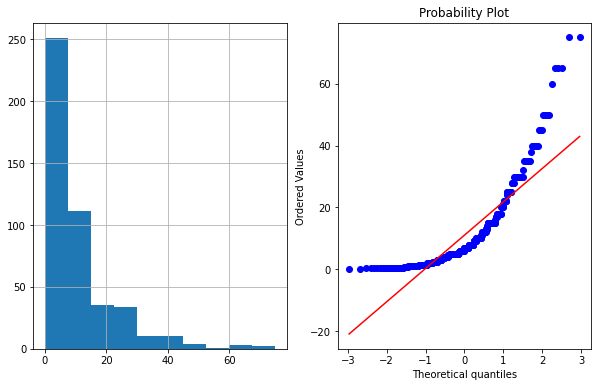

For page_views skewness is 3.244945857933644


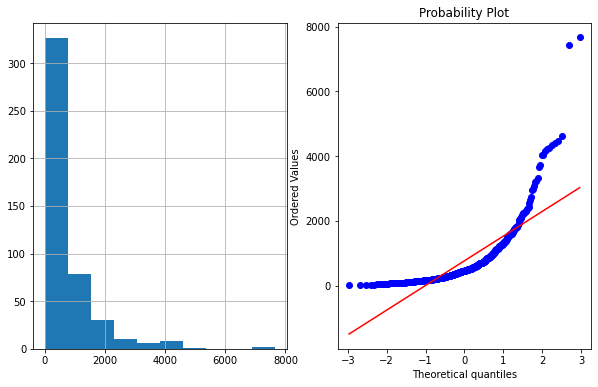

For fpl_sel skewness is 3.2726248936378823


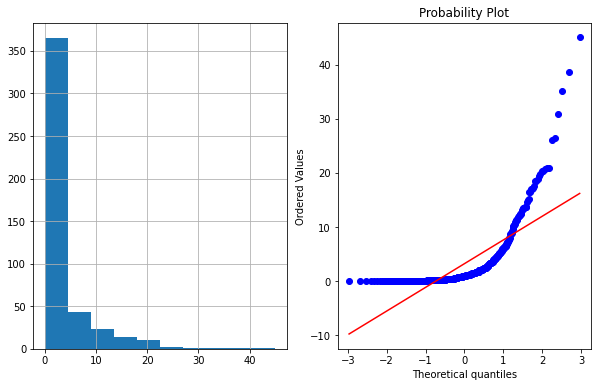

For fpl_points skewness is 0.8258790717325954


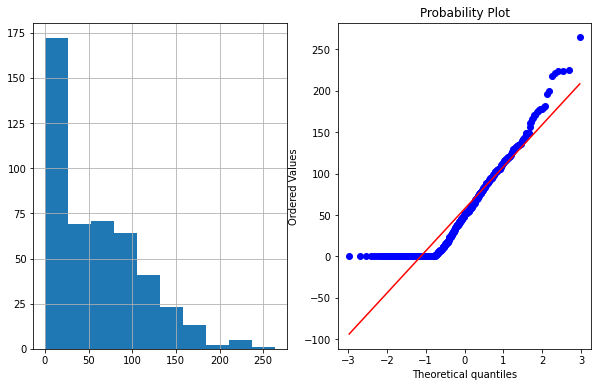

In [45]:
for feature in continuous_feature:
    data=df.copy()
    # data[feature], fitted_lambda = stat.boxcox(data[feature] + 1)
    print("For {} skewness is {}".format(feature, data[feature].skew()))
    Q_Q_plot(data, feature)

### we can see that log transformation was not successfull in transforming the distribution for most of the cases.

*** In the probability plot the more the point lies on the line the more is the data's distribution is Guassian 

For age skewness is -0.0092849574344663


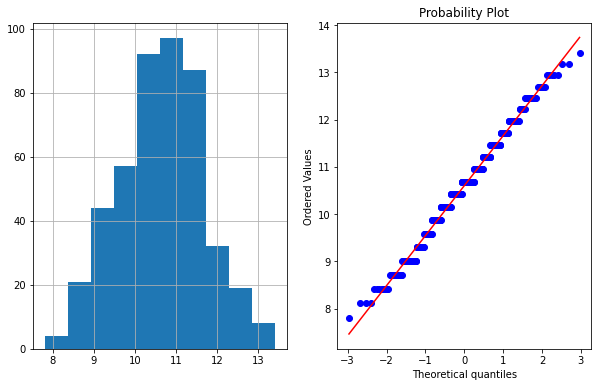

For market_value skewness is 0.003921367675023099


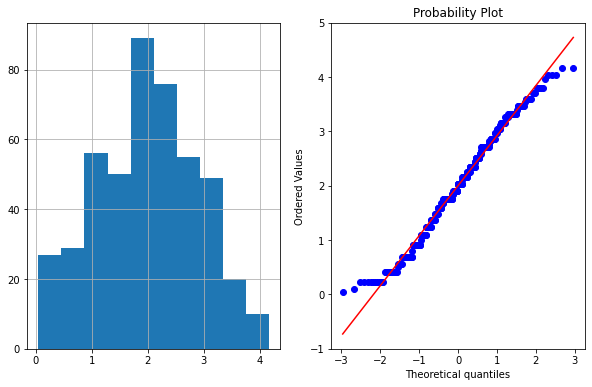

For page_views skewness is 0.009857360161723948


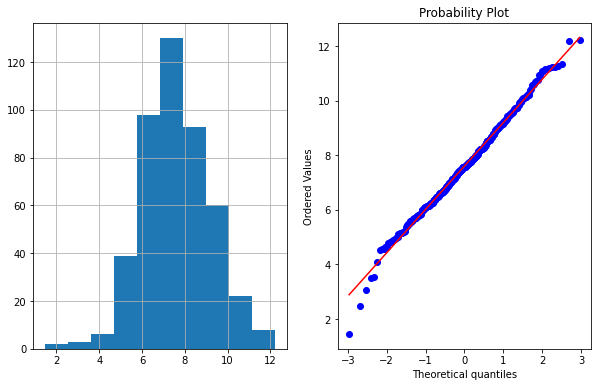

For fpl_sel skewness is 0.28083910691295644


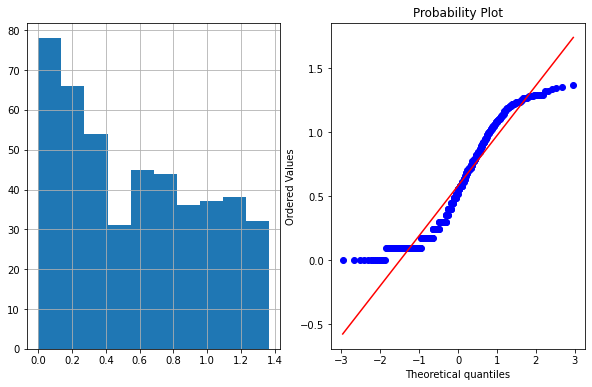

For fpl_points skewness is -0.3155780972275122


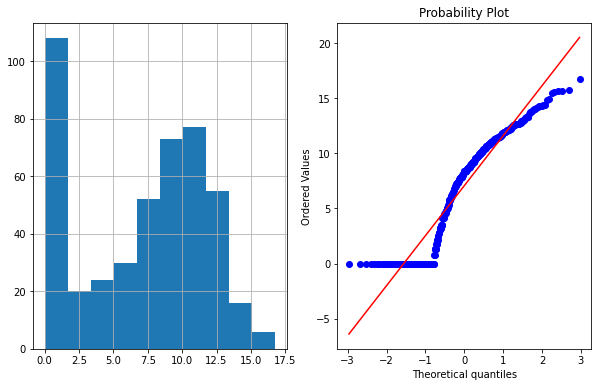

In [46]:
for feature in continuous_feature:
    data=df.copy()
    data[feature], fitted_lambda = stat.boxcox(data[feature] + 1)
    print("For {} skewness is {}".format(feature, data[feature].skew()))
    Q_Q_plot(data, feature)

### on applying the boxcox transformation we can see that the skewness is reduced in our features

### Outliers

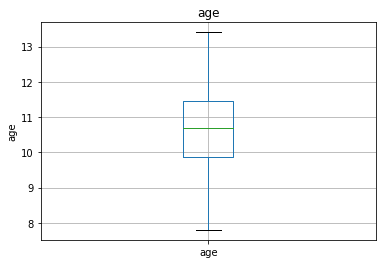

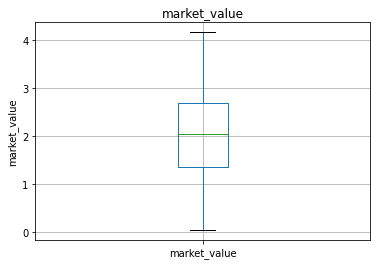

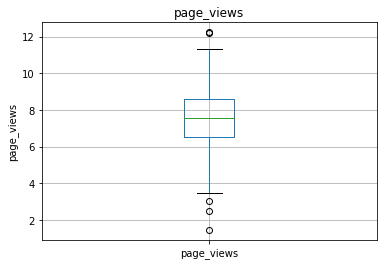

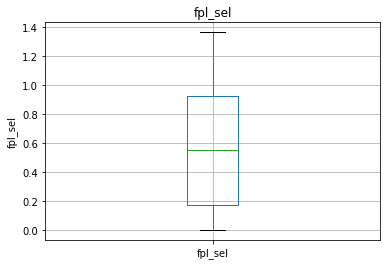

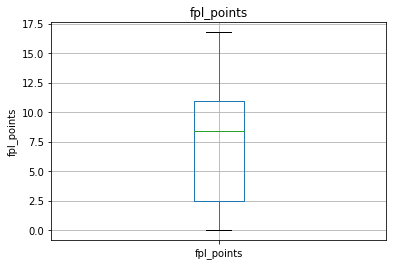

In [47]:
for feature in continuous_feature:
    data=df.copy()
    data[feature], fitted_lambda = stat.boxcox(data[feature] + 1)
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

we can see that there are some outliers in page views

In [48]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['name', 'club', 'position', 'nationality']

In [49]:
df[categorical_features].head()

,name,club,position,nationality
0,Alexis Sanchez,Arsenal,LW,Chile
1,Mesut Ozil,Arsenal,AM,Germany
2,Petr Cech,Arsenal,GK,Czech Republic
3,Theo Walcott,Arsenal,RW,England
4,Laurent Koscielny,Arsenal,CB,France


In [50]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is name and number of categories are 461
The feature is club and number of categories are 20
The feature is position and number of categories are 13
The feature is nationality and number of categories are 61


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


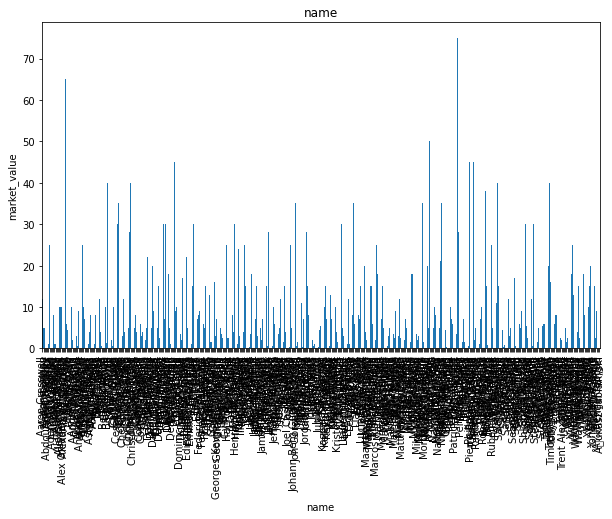

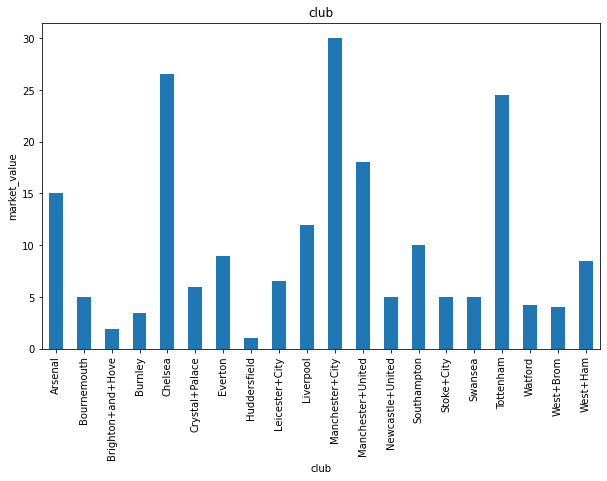

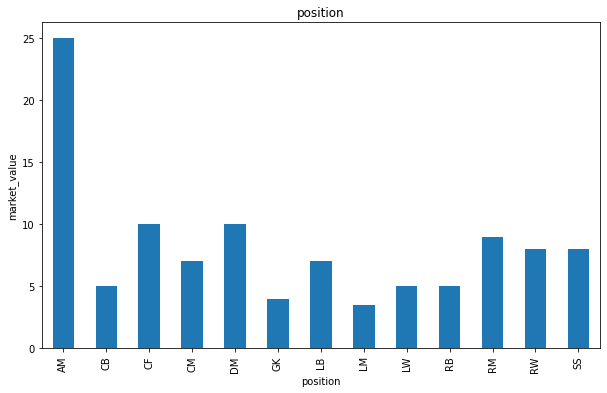

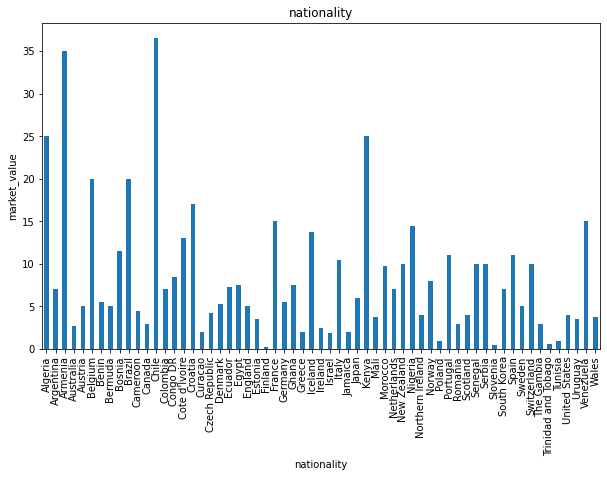

In [51]:
for feature in categorical_features:
    data=df.copy()
    plt.figure(figsize=(10,6))
    data.groupby(feature)['market_value'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('market_value')
    plt.title(feature)
    plt.show()

In [53]:
categorical_features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0 and df[feature].dtypes=='O']

for feature in categorical_features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))


No missing value in categorical Features

In [54]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))


region: 0.0022% missing value


In [55]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    median_value=df[feature].median()
    print(median_value)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

2.0


region    0
dtype: int64

We saw earlier that the data numerical data is skwed and boxcox tranformation was giving the best results for them we will be doing inplace operation for those categories in our data

In [56]:
continuous_feature

['age', 'market_value', 'page_views', 'fpl_sel', 'fpl_points']

In [57]:
for feature in continuous_feature:
    df[feature], fitted_lambda = stat.boxcox(df[feature] + 1)

In [58]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,10.946533,LW,1,4.036402,11.212546,12.0,1.269088,16.763601,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,10.946533,AM,1,3.796649,11.238991,9.5,1.065365,13.924623,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,12.698791,GK,4,2.041215,9.456404,5.5,1.077569,12.711570,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,10.946533,RW,1,2.963047,10.197268,7.5,0.682751,12.222075,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,11.716075,CB,3,3.049124,8.629036,6.0,0.445770,12.179888,2.0,France,0,4,1,1,0


### Droping the name, club and nationality features

In [59]:
df.drop(['name', 'club', 'nationality'], axis=1, inplace=True)

In [60]:
df.head()

,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
0,10.946533,LW,1,4.036402,11.212546,12.0,1.269088,16.763601,3.0,0,4,1,1,0
1,10.946533,AM,1,3.796649,11.238991,9.5,1.065365,13.924623,2.0,0,4,1,1,0
2,12.698791,GK,4,2.041215,9.456404,5.5,1.077569,12.711570,2.0,0,6,1,1,0
3,10.946533,RW,1,2.963047,10.197268,7.5,0.682751,12.222075,1.0,0,4,1,1,0
4,11.716075,CB,3,3.049124,8.629036,6.0,0.445770,12.179888,2.0,0,4,1,1,0


In [61]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [62]:
enc.fit(df[['position']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [63]:
import pickle
with open('encoder.pickle', 'wb') as f:
  pickle.dump(enc, f)

In [64]:
feature_lables = enc.categories_

In [65]:
feature_lables = np.array(feature_lables).ravel()

In [66]:
feature_lables

array(['AM', 'CB', 'CF', 'CM', 'DM', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM',
       'RW', 'SS'], dtype=object)

In [67]:
position_one_hot = enc.transform(df[['position']]).toarray()

In [68]:
position_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [69]:
encoded_dataFrame = pd.DataFrame(position_one_hot, columns=feature_lables)

In [70]:
df = pd.concat([df, encoded_dataFrame], axis=1)

In [71]:
df.head()

,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,AM,CB,CF,CM,DM,GK,LB,LM,LW,RB,RM,RW,SS
0,10.946533,LW,1,4.036402,11.212546,12.0,1.269088,16.763601,3.0,0,4,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10.946533,AM,1,3.796649,11.238991,9.5,1.065365,13.924623,2.0,0,4,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.698791,GK,4,2.041215,9.456404,5.5,1.077569,12.711570,2.0,0,6,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.946533,RW,1,2.963047,10.197268,7.5,0.682751,12.222075,1.0,0,4,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,11.716075,CB,3,3.049124,8.629036,6.0,0.445770,12.179888,2.0,0,4,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Droping AM column to get out of the dummy variable trap

In [72]:
df.drop(['position', 'AM'], axis=1, inplace=True)

In [73]:
df.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,CB,CF,CM,DM,GK,LB,LM,LW,RB,RM,RW,SS
0,10.946533,1,4.036402,11.212546,12.0,1.269088,16.763601,3.0,0,4,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10.946533,1,3.796649,11.238991,9.5,1.065365,13.924623,2.0,0,4,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.698791,4,2.041215,9.456404,5.5,1.077569,12.711570,2.0,0,6,1,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.946533,1,2.963047,10.197268,7.5,0.682751,12.222075,1.0,0,4,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,11.716075,3,3.049124,8.629036,6.0,0.445770,12.179888,2.0,0,4,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
y = df["market_value"]
X = df.drop("market_value", axis=1)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [76]:
X_train.shape, X_test.shape

((368, 24), (93, 24))

Linear Regression

In [77]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Regression_Linear = LinearRegression(normalize=True)

Regression_Linear.fit(X_train,y_train)
pred_linear = Regression_Linear.predict(X_test)
print("MSE score:",mean_squared_error(y_test,pred_linear))
print("Accuracy",r2_score(y_test,pred_linear))

MSE score: 0.2306339052132473
Accuracy 0.6800122500857713


Lasso Regression

In [78]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_lasso= model_lasso.predict(X_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_lasso)))
print("Accuracy",r2_score(y_test, pred_lasso))

MSE score: 0.4749303590211173
Accuracy 0.6870535253156608


Ridge Regression

In [79]:
from sklearn.linear_model import Ridge
Rigression_Ridge = Ridge(alpha=0.01)
Rigression_Ridge.fit(X_train, y_train) 
pred_Ridge= Rigression_Ridge.predict(X_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_Ridge)))
print("Accuracy:",r2_score(y_test, pred_Ridge))

MSE score: 0.4802479726797647
Accuracy: 0.68000640894826


Nearest Neighbour Regression

In [80]:
from sklearn import neighbors
from math import sqrt
rmse_val = []
k=6
model = neighbors.KNeighborsRegressor(n_neighbors = k)
a = model.fit(X_train, y_train) 
pred_neighbor=model.predict(X_test)
error = sqrt(mean_squared_error(y_test,pred_neighbor))
rmse_val.append(error) 

print('RMSE value for k= ' , k , 'is:', error)
print('Accuracy: %s' % a.score(X_test,y_test))


RMSE value for k=  6 is: 0.494042468730294
Accuracy: 0.6613596017344051


Support Vector Regression


In [81]:
from sklearn.svm import SVR
SupportVectorReg=SVR()
SupportVectorReg.fit(X_train,y_train)
pred_SVR=SupportVectorReg.predict(X_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_SVR)))
print("Accuracy:",r2_score(y_test, pred_SVR))

MSE score: 0.46098914362286003
Accuracy: 0.705156474580491


Tree Regression

In [82]:
from sklearn.tree import DecisionTreeRegressor
DecisionTreeReg=DecisionTreeRegressor()
DecisionTreeReg.fit(X_train,y_train)
pred_tree=DecisionTreeReg.predict(X_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_tree)))
print("Accuracy:",r2_score(y_test, pred_tree))

MSE score: 0.5692068000565597
Accuracy: 0.5504786127846979


Random Forest Regression

In [83]:
from sklearn.ensemble import RandomForestRegressor
RandomForestReg=RandomForestRegressor()
RandomForestReg.fit(X_train,y_train)
pred_forest=RandomForestReg.predict(X_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_forest)))
print("Accuracy:",r2_score(y_test, pred_forest))

MSE score: 0.4026750877629798
Accuracy: 0.7750325302250248


Gradient Boosting Regression

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(
    n_estimators= 500,
    min_samples_split= 5,
    learning_rate= 0.01,
)
regressor.fit(X_train,y_train)
pred_gradient = regressor.predict(X_test)
print("MSE score:",np.sqrt(mean_squared_error(y_test,pred_gradient)))
print("Accuracy:",r2_score(y_test,pred_gradient))

MSE score: 0.3895084630974733
Accuracy: 0.7895039278174102


So from the above observation it is clear that accuracy of gradient boosting is highest. Now we will check the accuracy after tuning the parameters and then will come to a conclusion.

#   **Hyperparameter Tuning**

In [85]:
from sklearn.model_selection import GridSearchCV,RepeatedKFold,RandomizedSearchCV

Linear Regression

In [86]:
model = LinearRegression()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['copy_X'] = [True, False]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=1, cv=cv)
result = search.fit(X_train, y_train)
print('Best Hyperparameters: %s' % result.best_params_)
print('LinearRegression GridSearch Accuracy: %s' % result.best_estimator_.score(X_test,y_test))

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
LinearRegression GridSearch Accuracy: 0.6800122500857706


Lasso Regression

In [87]:
model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['max_iter'] = [1,10,50,100]
space['copy_X'] = [True, False]
space['warm_start'] = [True, False]
space['selection'] = ['cyclic', 'random']
space['precompute'] = [True, False,]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % result.best_params_)
print('Lasso GridSearch Accuracy: %s' % result.best_estimator_.score(X_test,y_test))

Best Hyperparameters: {'alpha': 1e-05, 'copy_X': False, 'fit_intercept': True, 'max_iter': 10, 'normalize': True, 'precompute': True, 'selection': 'random', 'warm_start': True}
Lasso GridSearch Accuracy: 0.6880855800872612


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.509370188055684, tolerance: 0.032374977814489864
  tol, rng, random, positive)


Ridge Regression

In [89]:
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] =  ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['max_iter'] = [1,10,50,100,500,1000]
space['copy_X'] = [True, False]
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % result.best_params_)
print('Ridge GridSearch Accuracy: %s' % result.best_estimator_.score(X_test,y_test))

Best Hyperparameters: {'alpha': 0.1, 'copy_X': False, 'fit_intercept': True, 'max_iter': 10, 'normalize': True, 'solver': 'sag'}
Ridge GridSearch Accuracy: 0.6815343411071076


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


K Nearest Neighbour 

In [90]:
model=neighbors.KNeighborsRegressor()

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

search = GridSearchCV(model, hyperparameters, cv=10)
result = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % result.best_params_)
print('Knn GridSearch Score: %s' % result.best_estimator_.score(X_test,y_test))

Best Hyperparameters: {'leaf_size': 1, 'n_neighbors': 6, 'p': 1}
Knn GridSearch Score: 0.7066582705660307


Support Vector Machine 

In [91]:
model = SVR()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['max_iter'] = [1,10,50,100,200, 250, 300]
space['kernel']= ['linear','poly','rbf','sigmoid']
space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
space['C']: [0.1, 1, 10, 100, 1000]

search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

result = search.fit(X_train, y_train)
print('Best Hyperparameters: %s' % result.best_params_)
print('SVR GridSearch Accuracy: %s' % result.best_estimator_.score(X_test,y_test))

Best Hyperparameters: {'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 250}
SVR GridSearch Accuracy: 0.7837269725235378


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Tree Regression


In [92]:
model = DecisionTreeRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['max_depth']= [None,1,2,3,4,5,6,7]
space['max_features']= [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7 ]
space['min_samples_split']= [2,0.3,0.5]
space['min_samples_leaf']=[1, 0.3,0.5]
space['criterion'] = ['mse','friedman_mse','mae']
space['splitter'] = ['best','random']
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
print('Best Hyperparameters: %s' % result.best_params_)

#After looking at the best parameter now calculating the Accuracy 
DecisionTreeReg=DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 6, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
DecisionTreeReg.fit(X_train,y_train)
pred_tree=DecisionTreeReg.predict(X_test)
print("R2 score:",r2_score(y_test, pred_tree))

Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
R2 score: 0.6571994877682152


Random Forest


In [93]:
model = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
              
RF_RandomCv = RandomizedSearchCV(estimator=model,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
result=RF_RandomCv.fit(X_train,y_train)

print('Best Hyperparameters: %s' % result.best_params_)
print('Random Forest GridSearch Accuracy: %s' % result.best_estimator_.score(X_test,y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished


Best Hyperparameters: {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 1000}
Random Forest GridSearch Accuracy: 0.7912458769240002


Gradient Boosting 

In [94]:
model =GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['n_estimators']= [200, 400]
space['max_features']= ['auto', 'sqrt', 'log2']
space['max_depth'] = [4,5,6,7,8]
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100,0.99]
space['loss'] = ['ls', 'lad', 'huber', 'quantile']
space['subsample'] = [1]
search = RandomizedSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
result = search.fit(X_train, y_train)
print('Best Hyperparameters: %s' % result.best_params_)
print('Gradient Boosting Accuracy: %s' % result.best_estimator_.score(X_test,y_test))

Best Hyperparameters: {'subsample': 1, 'n_estimators': 400, 'max_features': 'log2', 'max_depth': 7, 'loss': 'huber', 'alpha': 0.99}
Gradient Boosting Accuracy: 0.8104958622978086


So after tuning the model , the accuracy of Gradient Boosting came out as the highest among all. So the best model is Gradient Boostoing Regression.

In [95]:
search.best_estimator_

GradientBoostingRegressor(alpha=0.99, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=7, max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [96]:
search.best_params_

{'alpha': 0.99,
 'loss': 'huber',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 400,
 'subsample': 1}

In [97]:
search

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
                   error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_spli...
                   iid='deprecated', n_ite

In [98]:
predictions = search.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


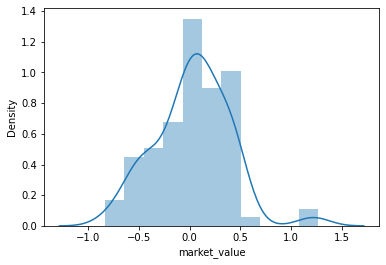

In [99]:
sns.distplot(y_test-predictions)

In [102]:
import pickle
# open a file, where you ant to store the data
file = open('gredientboostingRegresasor.pkl', 'wb')

# dump information to that file
pickle.dump(RF_RandomCv, file) #saving the weights of the model

### saving the GradientBoostingRegressor model